# Sephora Product Reviews Sentiment Analysis

### Import Libraries

In [1]:
# importing necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
import re
import nltk
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import ToktokTokenizer
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
import plotly.graph_objects as go
from sklearn.utils import shuffle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve
import networkx as nx
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Read The Data

##### Read the Product Info and Reviews datasets

In [2]:
data = pd.read_csv("C:/Users/muge/Dropbox/GMU/AIT 526/Project/product_info.csv")
r1 = pd.read_csv("C:/Users/muge/Dropbox/GMU/AIT 526/Project/reviews_0_250.csv")
r2 = pd.read_csv("C:/Users/muge/Dropbox/GMU/AIT 526/Project/reviews_250_500.csv")
r3 = pd.read_csv("C:/Users/muge/Dropbox/GMU/AIT 526/Project/reviews_500_750.csv")
r4 = pd.read_csv("C:/Users/muge/Dropbox/GMU/AIT 526/Project/reviews_750_1000.csv")
r5 = pd.read_csv("C:/Users/muge/Dropbox/GMU/AIT 526/Project/reviews_1000_1500.csv")
r6 = pd.read_csv("C:/Users/muge/Dropbox/GMU/AIT 526/Project/reviews_1500_end.csv")

C:\Users\muge\AppData\Local\Temp\ipykernel_34040\3483456774.py:2: DtypeWarning:

Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.

C:\Users\muge\AppData\Local\Temp\ipykernel_34040\3483456774.py:6: DtypeWarning:

Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.

C:\Users\muge\AppData\Local\Temp\ipykernel_34040\3483456774.py:7: DtypeWarning:

Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.



##### Merge reviews data

In [3]:
rev = pd.concat([r1, r2, r3, r4, r5, r6])

##### Merge reviews and product info using product_id

In [4]:
cols_to_use = data.columns.difference(rev.columns).tolist()
cols_to_use.append('product_id')
df = pd.merge(rev, data[cols_to_use], how='outer', on=['product_id', 'product_id'])
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1307279 entries, 0 to 1307278
Data columns (total 41 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   Unnamed: 0                1301136 non-null  float64
 1   author_id                 1301136 non-null  object 
 2   rating                    1301136 non-null  float64
 3   is_recommended            1107162 non-null  float64
 4   helpfulness               631670 non-null   float64
 5   total_feedback_count      1301136 non-null  float64
 6   total_neg_feedback_count  1301136 non-null  float64
 7   total_pos_feedback_count  1301136 non-null  float64
 8   submission_time           1301136 non-null  object 
 9   review_text               1299520 non-null  object 
 10  review_title              930754 non-null   object 
 11  skin_tone                 1103798 non-null  object 
 12  eye_color                 1057734 non-null  object 
 13  skin_type                 1

### Data Cleaning

#### Handling Missing Data

In [5]:
num_missing = df.isna().sum()
num_missing

Unnamed: 0                     6143
author_id                      6143
rating                         6143
is_recommended               200117
helpfulness                  675609
total_feedback_count           6143
total_neg_feedback_count       6143
total_pos_feedback_count       6143
submission_time                6143
review_text                    7759
review_title                 376525
skin_tone                    203481
eye_color                    249545
skin_type                    134449
hair_color                   269455
product_id                        0
product_name                   6143
brand_name                     6143
price_usd                      6143
brand_id                          0
child_count                       0
child_max_price              790996
child_min_price              790996
highlights                   135691
ingredients                   25995
limited_edition                   0
loves_count                       0
new                         

In [6]:
pct_missing = df.isna().mean()
pct_missing

Unnamed: 0                  0.004699
author_id                   0.004699
rating                      0.004699
is_recommended              0.153079
helpfulness                 0.516806
total_feedback_count        0.004699
total_neg_feedback_count    0.004699
total_pos_feedback_count    0.004699
submission_time             0.004699
review_text                 0.005935
review_title                0.288022
skin_tone                   0.155652
eye_color                   0.190889
skin_type                   0.102846
hair_color                  0.206119
product_id                  0.000000
product_name                0.004699
brand_name                  0.004699
price_usd                   0.004699
brand_id                    0.000000
child_count                 0.000000
child_max_price             0.605071
child_min_price             0.605071
highlights                  0.103797
ingredients                 0.019885
limited_edition             0.000000
loves_count                 0.000000
n

##### Visualize missing data with Heatmap

<Axes: >

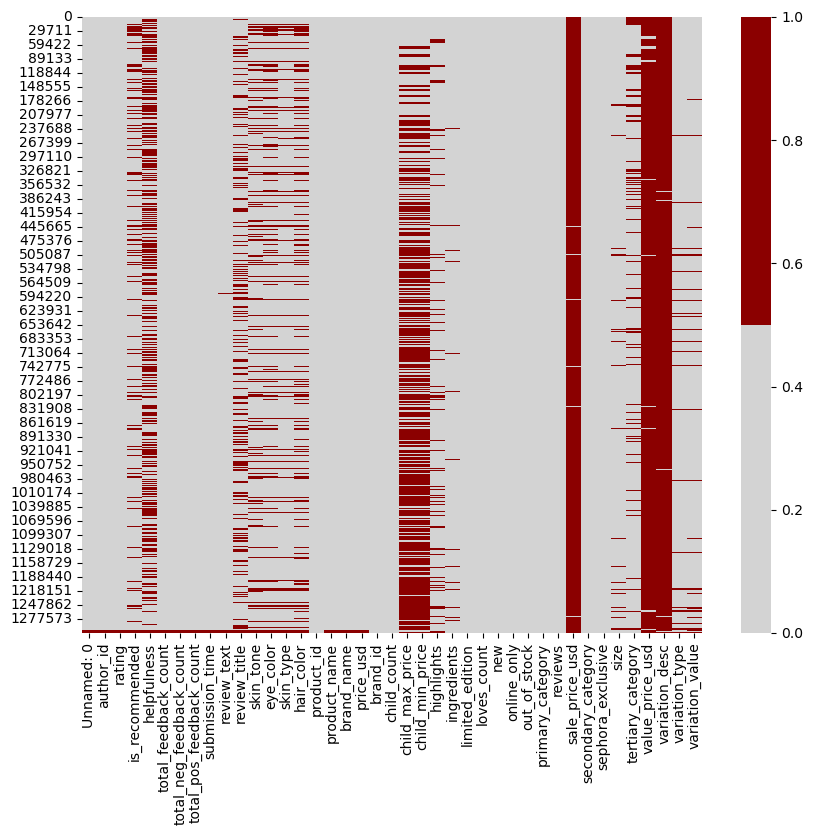

In [7]:
plt.figure(figsize=(10,8))

cols= df.columns
colors=['lightgray','darkred']
sns.heatmap(df[cols].isna(),cmap=sns.color_palette(colors))

#### Outliers

In [8]:
df.kurt(numeric_only=True)

Unnamed: 0                     -0.158336
rating                          1.743796
is_recommended                  1.422183
helpfulness                     0.625755
total_feedback_count         9392.851445
total_neg_feedback_count     5348.695138
total_pos_feedback_count    11959.954484
price_usd                      36.928923
brand_id                        1.954119
child_count                   151.979573
child_max_price                19.267332
child_min_price                18.762223
limited_edition                52.716524
loves_count                    19.689367
new                            34.380745
online_only                     4.684966
out_of_stock                   26.695930
reviews                        14.532616
sale_price_usd                197.153387
sephora_exclusive              -1.442571
value_price_usd                 3.385997
dtype: float64

In [9]:
df['price_usd'].describe()

count    1.301136e+06
mean     4.932434e+01
std      3.934314e+01
min      3.000000e+00
25%      2.600000e+01
50%      4.000000e+01
75%      6.400000e+01
max      1.900000e+03
Name: price_usd, dtype: float64

<Axes: >

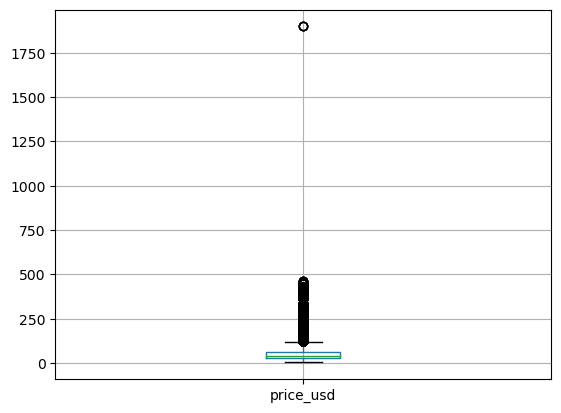

In [10]:
df.boxplot(column=['price_usd'])

In [11]:
data.loc[data['price_usd']==1900]

product_id                               product_name  brand_id  \
6802    P502216  Shani Darden by Déesse PRO LED Light Mask      6314   

                  brand_name  loves_count  rating  reviews size  \
6802  Shani Darden Skin Care         4154    3.75      4.0  NaN   

     variation_type variation_value  ... online_only out_of_stock  \
6802            NaN             NaN  ...           1            0   

      sephora_exclusive                                         highlights  \
6802                  1  ['Good for: Loss of firmness', 'Good for: Anti...   

      primary_category  secondary_category  tertiary_category  child_count  \
6802          Skincare     High Tech Tools         Anti-Aging            0   

      child_max_price  child_min_price  
6802              NaN              NaN  

[1 rows x 27 columns]

#### Removing Unnecessary Data

In [ ]:
num_rows = len(data)

for col in df.columns:
    counts=df[col].value_counts(dropna=False)
    top_pct=(counts/num_rows).iloc[0]
    
    if top_pct > 0.50:
        print('{0}:{1:2f}%'.format(col,top_pct*100))
        print(counts)
        print()

Unnamed: 0:72.321639%
NaN         6143
33335.0        6
33313.0        6
33314.0        6
33315.0        6
            ... 
338525.0       1
338524.0       1
338523.0       1
338522.0       1
301065.0       1
Name: Unnamed: 0, Length: 602131, dtype: int64

author_id:72.321639%
NaN            6143
1696370280      288
1288462295      203
2330399812      166
5060164185      165
               ... 
35785194231       1
34116589282       1
38362244649       1
37964060718       1
1336674880        1
Name: author_id, Length: 578654, dtype: int64

rating:9715.481516%
5.0    825233
4.0    240893
3.0     98906
1.0     72825
2.0     63279
NaN      6143
Name: rating, dtype: int64

is_recommended:10942.736049%
1.0    929476
NaN    200117
0.0    177686
Name: is_recommended, dtype: int64

helpfulness:7953.955733%
NaN         675609
1.000000    297567
0.000000     56412
0.500000     41531
0.666667     29534
             ...  
0.225490         1
0.965753         1
0.017857         1
0.962121         1
0

##### Drop the columns and create a new df

In [ ]:
df1 = df.drop(columns=['variation_desc','value_price_usd','sale_price_usd','limited_edition','new','online_only','out_of_stock','sephora_exclusive','child_count','child_max_price','child_min_price', 'is_recommended','helpfulness','total_feedback_count','total_neg_feedback_count','total_pos_feedback_count','skin_tone','eye_color','skin_type','hair_color'],axis=1)

# we can also remove the outlier we discovered earlier

df1 = df1[df1.price_usd != 1900]

df1.info()

#### Dealing with duplicate entrees

In [ ]:
duplicates = df1.duplicated(subset=['review_text']).sum()
df1 = df1.drop_duplicates()
print("Number of duplicated rows:", duplicates)

### Exploratory Data Analysis

#### Product Categories

In [ ]:
df1.primary_category.value_counts()

In [ ]:
df1.secondary_category.value_counts()

In [ ]:
df1.tertiary_category.value_counts()

#### Most Similar Products by Ingredients

In [ ]:
ing = pd.DataFrame(data, columns=['product_id','product_name','brand_name','ingredients','price_usd'])

##### Dropping products with no ingredients and Resetting the index

In [ ]:
# dropping products with no ingredients

ing = ing.dropna()

# resetting the index

ing = ing.reset_index(drop=True)

#printing the resulting shape of the dataframe, which is 7,549 rows by 5 columns

ing.shape

#### Pairwise similarity

In [ ]:
# extracting the values from the ingredients column as our corpus
texts = ing.ingredients.values

tfidf = TfidfVectorizer().fit_transform(texts)

# vectorizer automatically returns a normalized tf-idf

pairwise_similarity = tfidf * tfidf.T

In [ ]:
pairwise_similarity

In [ ]:
# Convert the sparse matrix to a dense matrix for visualization
pairwise_similarity_dense = pairwise_similarity.toarray()

# Create a heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(pairwise_similarity_dense, cmap='viridis')
plt.title('Pairwise Similarity Matrix')
plt.xlabel('Document Index')
plt.ylabel('Document Index')
plt.show()

In [ ]:
arr = pairwise_similarity.toarray()
np.fill_diagonal(arr, np.nan)
arr

In [ ]:
maxes = np.nanargmax(arr, axis=0)
maxes.shape

In [ ]:
# convert the array to a dataframe object

ast = pd.DataFrame(maxes)
ast.shape

In [ ]:
# creating the "most similar index" column from the new dataframe object and appending it to our dataset

ing['most_sim_index'] = ast
ing.head()

In [ ]:
products = ing.product_name.values

idxes = ing['most_sim_index']

ing['most_sim_product'] = products[idxes]
ing.head()

In [ ]:
ing2 = ing.drop('most_sim_index', axis=1)
ing2 = ing2.drop('most_sim_product', axis=1)
ing2 = ing2[~ing2['product_name'].str.contains('Travel')]
ing2 = ing2[~ing2['product_name'].str.contains('travel')]
ing2.shape

In [ ]:
ing2 = ing2.reset_index(drop=True)

texts2 = ing2.ingredients.values
tfidf2 = TfidfVectorizer().fit_transform(texts2)

pairwise_similarity2 = tfidf2 * tfidf2.T
pairwise_similarity2.toarray()

arr2 = pairwise_similarity2.toarray()
np.fill_diagonal(arr2, np.nan)

maxes2 = np.nanargmax(arr2, axis=0)

ast2 = pd.DataFrame(maxes2)

ing2['most_sim_index'] = ast2

products2 = ing2.product_name.values
idxes2 = ing2['most_sim_index']

ing2['most_sim_product'] = products2[idxes2]
ing2.head()

In [ ]:
prices = ing2.price_usd.values
brands = ing2.brand_name.values

ing2['price_sim'] = prices[idxes2]
ing2['brand_sim'] = brands[idxes2]

ing2.head(15)

### Sentiment Analysis

In [ ]:
df1.head()

#### Product score distribution

In [ ]:
color = sns.color_palette()
%matplotlib inline
py.init_notebook_mode(connected=True)

# produce scores

fig = px.histogram(df1, x="rating", color='rating', color_discrete_sequence=px.colors.qualitative.Vivid)
fig.update_traces(marker_line_color='gray', marker_line_width=1.5)
fig.update_layout(title_text='Product Score')
fig.show()

#### Text Pre-processing

In [ ]:
def preprocess_text(text, remove_digits=True):
    # Removing HTML tags
    text = BeautifulSoup(text, "html.parser").get_text()
    
    # Removing square brackets
    text = re.sub(r'\[[^]]*\]', '', text)
    
    # Removing special characters
    if remove_digits:
        text = re.sub(r'[^a-zA-Z\s]', '', text)
    else:
        text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    
    # Lowercasing
    text = text.lower()
    
    # Stemming
    ps = PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    
    # Removing stopwords
    stopword_list = set(stopwords.words('english'))
    tokenizer = ToktokTokenizer()
    tokens = tokenizer.tokenize(text)
    filtered_tokens = [token for token in tokens if token not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)
    
    return filtered_text

In [ ]:
# Create preprocessing functions to be used with pandas vectorized operations
def remove_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

def remove_square_brackets(text):
    return re.sub(r'\[[^]]*\]', '', text)

def preprocess_text(text, remove_digits=True):
    text = remove_html_tags(text)
    text = remove_square_brackets(text)
    if remove_digits:
        text = re.sub(r'[^a-zA-Z\s]', '', text)
    else:
        text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = text.lower()
    return text

# Apply preprocessing functions using vectorized operations
print('BEFORE (preprocess_text):\n', df1['review_text'][2])

df1['review_text'] = df1['review_text'].astype(str)
df1['review_text'] = df1['review_text'].apply(remove_html_tags)
df1['review_text'] = df1['review_text'].apply(remove_square_brackets)
df1['review_text'] = df1['review_text'].apply(preprocess_text)

print('\nAFTER (preprocess_text):\n', df1['review_text'][2])

#### Creating Wordclouds

In [ ]:
empty_rows = df1[df1['review_text'].str.strip().isna()]
print(empty_rows)

In [ ]:
# ensuring that the reviews and titles are in fact string datatypes

df1['review_text'] = df1['review_text'].astype(str)
df1['review_title'] = df1['review_title'].astype(str)

# create stopword list

stopwords = set(stopwords.words())
stopwords.update(['day','night','received','make','week','morning','put','leave'])

# generating a wordcloud and plotting the results

text = " ".join(review_title for review_title in df1.review_text)
wordcloud = WordCloud(stopwords=stopwords, background_color='white', colormap='viridis', width=800,
                       height=400).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
df2 = df1[df1['rating'] !=3]
df2['sentiment']= df2['rating'].apply(lambda rating: +1 if rating >3 else -1)
df2.head()

In [ ]:
# split df into positive and negative

positive = df2[df2['sentiment']==1]
negative = df2[df2['sentiment']==-1]

##### Positive Wordcloud

In [ ]:
# setting stopwords for the positive wordcloud
import nltk
from nltk.corpus import stopwords

stopwords = set(stopwords.words())
stopwords.update(['received','day','make','feel','leave','buy','noticed','good','product','great', 'nan','work','works','stuff','finally'])

In [ ]:
# generating a wordcloud and plotting the results

pos = " ".join(review_title for review_title in positive.review_title)
wordcloud2= WordCloud(stopwords=stopwords, background_color='white', colormap='viridis', width=800,
                       height=400).generate(pos)

plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

##### Negative Wordcloud

In [ ]:
neg = " ".join(review_title for review_title in negative.review_title)
wordcloud7 = WordCloud(stopwords=stopwords, background_color='white', colormap='viridis',width=800,
                       height=400).generate(neg)
stopwords.update(['work','wanted','caused','made','makes','buy','love'])

plt.imshow(wordcloud7, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Distribution of reviews by sentiment

In [ ]:
#Distribution of reviews by sentiment

df2['sentimentt'] = df2['sentiment'].replace({-1: 'negative'})
df2['sentimentt'] = df2['sentimentt'].replace({1: 'positive'})

# Create two separate dataframes for positive and negative sentiment
df_positive = df2[df2['sentimentt'] == 'positive']
df_negative = df2[df2['sentimentt'] == 'negative']

# Create two separate histograms for positive and negative sentiment
fig = go.Figure()

fig.add_trace(go.Histogram(
    x=df_positive['sentimentt'],
    marker_color='seagreen',
    name='Positive Sentiment'))

fig.add_trace(go.Histogram(
    x=df_negative['sentimentt'],
    marker_color='indianred',
    name='Negative Sentiment'))

fig.update_layout(
    barmode='overlay',
    title_text='Product Sentiment')

fig.update_traces(marker_line_color='gray',marker_line_width = 1.5)

fig.show()

### Sentiment Analysis Model

In [ ]:
# Building the Sentiment Analysis Model
# Removing Punctuation

df2['review_text'] = df2['review_text'].astype(str)
df2['review_title'] = df2['review_title'].astype(str)

def remove_punctuation(text):
    final="".join(u for u in text if u not in ("?",".",";",":","!",'"'))
    return final

df2['review_text'] = df2['review_text'].apply(remove_punctuation)
df2=df2.dropna(subset=['review_title'])
df2['review_title']=df2['review_title'].apply(remove_punctuation)

In [ ]:
# new df with only two columnss: review_title and sentiment

new_text = df2[['review_title','sentiment']]
new_text.head()

##### Reduce the dataset size using stratified sampling

In [ ]:
# Reduce the dataset size using stratified sampling
sampled_data = df2.sample(frac=0.2, random_state=42)  # Adjust the sampling fraction as needed

##### Handling imbalanced data

In [ ]:
sampled_data.sentiment.value_counts()

In [ ]:
print("Positive labels percentage", round(sampled_data.sentiment.value_counts()[1]/len(sampled_data) *100 ,2), "%")
print("Negative labels percentage", round(sampled_data.sentiment.value_counts()[-1]/len(sampled_data) *100 ,2), "%")

In [ ]:
plt.figure(figsize=(10,3))
colors=['#AB47BC','#6495ED']
plt.pie(sampled_data['sentiment'].value_counts(),labels=['Positive','Negative'],autopct='%.2f%%',explode=[0.01,0.01],colors=colors);
plt.title('Distribution of target')
plt.ylabel('Sentiment');

In [ ]:
# Downsizing majority class
sampled_data_neg = sampled_data[sampled_data['sentiment'] == -1]
sampled_data_pos = sampled_data[sampled_data['sentiment'] == 1].sample(len(sampled_data_neg)) # samples a number of rows equal to the length of df_neg

In [ ]:
sampled_data_neg.sentiment.value_counts()

In [ ]:
sampled_data_pos.sentiment.value_counts()

In [ ]:
# concatenating and shuffling to get final usable dataset
df3 = pd.concat([sampled_data_pos, sampled_data_neg], axis = 0)
df3 = shuffle(df3)
df3.head()

In [ ]:
# print percentage of both labels present

print("Positive labels percentage:", round(df3.sentiment.value_counts()[1] / len(df3) * 100, 2), "%")
print("Negative labels percentage:", round(df3.sentiment.value_counts()[-1] / len(df3) * 100, 2), "%")

In [ ]:
plt.figure(figsize=(10,3))
colors=['#AB47BC','#6495ED']
plt.pie(df3['sentiment'].value_counts(),labels=['Positive','Negative'],autopct='%.2f%%',explode=[0.01,0.01],colors=colors);
plt.title('Distribution of target')
plt.ylabel('Sentiment');

##### Split train and test data

In [ ]:
# Split the sampled data into train and test sets
train, test = train_test_split(df3, test_size=0.2, random_state=42)

##### Create a Bag of Words

In [ ]:
# Count vectorizer
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')

train_matrix = vectorizer.fit_transform(train['review_title'])
test_matrix = vectorizer.transform(test['review_title'])

#### Logistic Regression

In [ ]:
# Import Logistic Regression

lr = LogisticRegression()

In [ ]:
# Split Target and Independent Variables

X_train = train_matrix
X_test = test_matrix
y_train = train['sentiment']
y_test = test['sentiment']

In [ ]:
# Fit Model on Data

lr.fit(X_train,y_train)

In [ ]:
predictions = lr.predict(X_test)

# Calculate accuracy for Ligistic Regression
lr_accuracy = accuracy_score(y_test, predictions)
print("Logistic Regression Accuracy:", lr_accuracy)

##### Confusion matrix

In [ ]:
new=np.asarray(y_test)
confusion_matrix(predictions,y_test)

In [ ]:
# Calculate confusion matrix
cm = confusion_matrix(predictions, y_test)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
print(classification_report(predictions,y_test))

##### ROC Curve

In [ ]:
# Calculate probabilities for positive class
probabilities = lr.predict_proba(X_test)[:, 1]

# Calculate false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, probabilities)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

##### Precision-Recall Curve

In [ ]:
# Calculate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, probabilities)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Logistic Regression')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

#### Support Vector Machine (SVM)

In [ ]:
# Use SVM with a linear kernel
svm = SVC(kernel='linear')

# Fit SVM Model on Data
svm.fit(X_train, y_train)
svm_predictions = svm.predict(X_test)

# Calculate accuracy for SVM
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("SVM Accuracy:", svm_accuracy)

#### Random Forest Classifier

In [ ]:
# Use Random Forest with reduced number of estimators
rf = RandomForestClassifier(n_estimators=100, max_depth=10)

# Fit Random Forest Model on Data
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)

# Calculate accuracy for Random Forest
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)

In [ ]:
from sklearn.metrics import accuracy_score

# Calculate accuracy for Logistic Regression
lr_accuracy = accuracy_score(y_test, predictions)
print("Logistic Regression Accuracy:", lr_accuracy)

# Calculate accuracy for SVM
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("SVM Accuracy:", svm_accuracy)

# Calculate accuracy for Random Forest
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate accuracy for each classifier
classifiers = ['Logistic Regression', 'SVM', 'Random Forest']
accuracies = [lr_accuracy, svm_accuracy, rf_accuracy]

# Sort the classifiers and accuracies in descending order based on accuracies
classifiers_sorted = [x for _, x in sorted(zip(accuracies, classifiers), reverse=True)]
accuracies_sorted = sorted(accuracies, reverse=True)

# Create a colormap with the number of classifiers as the length
cmap = plt.cm.get_cmap('Accent', len(classifiers_sorted))

# Create a bar plot with different colors for each classifier in descending order
plt.bar(classifiers_sorted, accuracies_sorted, color=cmap(np.arange(len(classifiers_sorted))))
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Classifiers')
plt.ylim([0, 1])  # Set the y-axis limits to range from 0 to 1

plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve, auc

# Calculate ROC curve and AUC for Logistic Regression
lr_fpr, lr_tpr, lr_thresholds = roc_curve(y_test, predictions)
lr_auc = auc(lr_fpr, lr_tpr)

# Calculate Precision-Recall curve and AUC for Logistic Regression
lr_precision, lr_recall, _ = precision_recall_curve(y_test, predictions)
lr_pr_auc = auc(lr_recall, lr_precision)

# Calculate ROC curve and AUC for SVM
svm_fpr, svm_tpr, svm_thresholds = roc_curve(y_test, svm_predictions)
svm_auc = auc(svm_fpr, svm_tpr)

# Calculate Precision-Recall curve and AUC for SVM
svm_precision, svm_recall, _ = precision_recall_curve(y_test, svm_predictions)
svm_pr_auc = auc(svm_recall, svm_precision)

# Calculate ROC curve and AUC for Random Forest
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_predictions)
rf_auc = auc(rf_fpr, rf_tpr)

# Calculate Precision-Recall curve and AUC for Random Forest
rf_precision, rf_recall, _ = precision_recall_curve(y_test, rf_predictions)
rf_pr_auc = auc(rf_recall, rf_precision)

# Plot ROC curve
plt.figure(figsize=(10, 5))
plt.plot(lr_fpr, lr_tpr, label='Logistic Regression (AUC = %0.2f)' % lr_auc)
plt.plot(svm_fpr, svm_tpr, label='SVM (AUC = %0.2f)' % svm_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (AUC = %0.2f)' % rf_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot Precision-Recall curve
plt.figure(figsize=(10, 5))
plt.plot(lr_recall, lr_precision, label='Logistic Regression (AUC = %0.2f)' % lr_pr_auc)
plt.plot(svm_recall, svm_precision, label='SVM (AUC = %0.2f)' % svm_pr_auc)
plt.plot(rf_recall, rf_precision, label='Random Forest (AUC = %0.2f)' % rf_pr_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

##### Example Predictions

In [ ]:
# Select a few instances from the test set
num_examples = 5  # Number of examples to print
example_indices = np.random.choice(range(len(test)), num_examples, replace=False)

# Print example predictions for Logistic Regression classifier
print("\033[1m\033[34mExample Predictions for Logistic Regression Classifier:\033[0m")
for idx in example_indices:
    instance = test.iloc[idx]['review_text']
    true_label = test.iloc[idx]['sentiment']
    lr_pred = lr.predict(X_test[idx])
    lr_pred_label = "Positive" if lr_pred == 1 else "Negative"
    print("Instance:", instance)
    print("True Label:", true_label)
    print("Logistic Regression Prediction:", lr_pred_label)
    print()

# Print example predictions for SVM classifier
print("\033[1m\033[34mExample Predictions for SVM Classifier:\033[0m")
for idx in example_indices:
    instance = test.iloc[idx]['review_text']
    true_label = test.iloc[idx]['sentiment']
    svm_pred = svm.predict(X_test[idx])
    svm_pred_label = "Positive" if svm_pred == 1 else "Negative"
    print("Instance:", instance)
    print("True Label:", true_label)
    print("SVM Prediction:", svm_pred_label)
    print()

# Print example predictions for Random Forest classifier
print("\033[1m\033[34mExample Predictions for Random Forest Classifier:\033[0m")
for idx in example_indices:
    instance = test.iloc[idx]['review_text']
    true_label = test.iloc[idx]['sentiment']
    rf_pred = rf.predict(X_test[idx])
    rf_pred_label = "Positive" if rf_pred == 1 else "Negative"
    print("Instance:", instance)
    print("True Label:", true_label)
    print("Random Forest Prediction:", rf_pred_label)
    print()

### Data Visualization

In [ ]:
print(df1['product_name'].nunique())
print(df1['brand_name'].nunique())

In [ ]:
df1.groupby('brand_name')['loves_count'].sum().nlargest(10)

In [ ]:
sns.set(rc={'figure.figsize':(16,9)})

k = df1.groupby('brand_name', as_index=False)['loves_count'].sum().sort_values(by='loves_count', ascending=False).head(5)
ax = sns.barplot(data=k, x='brand_name', y='loves_count', hue='brand_name', dodge=False)

# Iterate over each patch and set the edge color and line width
for container in ax.containers:
    for patch in container.patches:
        patch.set_edgecolor('gray')
        patch.set_linewidth(1.5)

ax.set(xticklabels=[])
plt.show()

In [ ]:
df1.groupby('brand_name')['loves_count'].sum().nsmallest(5)

In [ ]:
sns.set(rc={'figure.figsize':(16,9)})

k = df1.groupby('brand_name', as_index=False)['loves_count'].sum().sort_values(by='loves_count', ascending=True).head(5)
ax=sns.barplot(data=k, x='brand_name',y='loves_count',hue='brand_name',dodge=False)

for container in ax.containers:
    for patch in container.patches:
        patch.set_edgecolor('gray')
        patch.set_linewidth(1.5)

ax.set(xticklabels=[])
plt.show()

In [ ]:
sns.set(rc={'figure.figsize':(16,9)})

k = df2.groupby('brand_name', as_index=False)['sentiment'].sum().sort_values(by='sentiment', ascending=False).head(5)
ax=sns.barplot(data=k, x='brand_name',y='sentiment',hue='brand_name',dodge=False)

for container in ax.containers:
    for patch in container.patches:
        patch.set_edgecolor('gray')
        patch.set_linewidth(1.5)

ax.set(xticklabels=[])
plt.show()

In [ ]:
sns.set(rc={'figure.figsize':(16,9)})

k = df2.groupby('brand_name', as_index=False)['sentiment'].sum().sort_values(by='sentiment', ascending=True).head(5)
ax = sns.barplot(data=k, x='brand_name',y='sentiment',hue='brand_name',dodge=False)

for container in ax.containers:
    for patch in container.patches:
        patch.set_edgecolor('gray')
        patch.set_linewidth(1.5)

ax.set(xticklabels=[])
plt.show()

In [ ]:
sns.set(rc={'figure.figsize':(16,9)})

k = df2.groupby('product_name', as_index=False)['sentiment'].sum().sort_values(by='sentiment', ascending=False).head(5)
ax=sns.barplot(data=k, x='product_name',y='sentiment',hue='product_name',dodge=False)

for container in ax.containers:
    for patch in container.patches:
        patch.set_edgecolor('gray')
        patch.set_linewidth(1.5)

ax.set(xticklabels=[])
plt.show()

In [ ]:
sns.set(rc={'figure.figsize':(16,9)})

k = df2.groupby('product_name', as_index=False)['sentiment'].sum().sort_values(by='sentiment', ascending=True).head(5)
ax=sns.barplot(data=k, x='product_name',y='sentiment',hue='product_name',dodge=False)

for container in ax.containers:
    for patch in container.patches:
        patch.set_edgecolor('gray')
        patch.set_linewidth(1.5)

ax.set(xticklabels=[])
plt.show()

#### Referrences

##### Inky, N. (2023, March). Sephora Products and Skincare Reviews. Retrieved July, 2023 from https://www.kaggle.com/datasets/nadyinky/sephora-products-and-skincare-reviews?select=reviews_0_250.csv

##### Perez, D. (2023, July). Project 5: Sephora Products and Reviews Analysis. Retrieved July, 2023 from https://www.kaggle.com/code/dannyperez014/project-5-sephora-products-and-reviews-analysis